In [1]:
# GHOST - Euler Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 4

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L10_x_5y_5.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,10.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,10.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2, L=10.0), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

# solver parameters
params = {"project_title": "euler_test_2d_p4qi",
         "problem": "compressible_euler",
         "specific_heat_ratio": 1.4,
         "numerical_flux": "roe",
         "initial_condition": "isentropic_vortex",
         "initial_vortex_centre": np.array([5.0,5.0]),
         "background_temperature": 1.0,
         "background_velocity": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "solution_representation": "modal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver = Solver(params,mesh)
#solver.discretization.plot(plot_geometry_nodes=True, filename="../plots/quadrature_p3.pdf")

In [2]:
solver.run(write_interval=0.1)

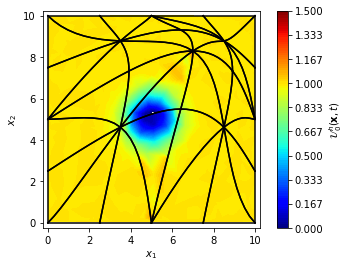

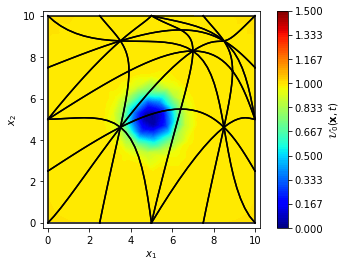

In [6]:
solver.post_process()
solver.plot(plot_numerical=True, plot_exact=True,
            plot_curves=True, plot_nodes=False, u_range=[0,1.5])

In [4]:
solver.u_0(solver.discretization.x_omega[0])

array([[1.        , 1.        , 0.99982216, 1.        , 0.99999215,
        1.        , 1.        , 1.        , 1.        , 0.95542365,
        1.        , 0.99999997, 0.99990852, 1.        , 0.98955426,
        1.        ],
       [1.        , 1.        , 1.00021446, 1.        , 1.00001608,
        1.        , 1.        , 1.        , 1.        , 0.99608448,
        1.        , 1.00000009, 1.00009674, 1.        , 1.00645542,
        1.        ],
       [1.        , 1.        , 0.99935881, 1.        , 0.99997248,
        0.99999999, 1.        , 1.        , 1.        , 0.87100483,
        1.        , 0.9999999 , 0.99964567, 1.        , 0.96911074,
        1.        ],
       [3.5       , 3.5       , 3.49912887, 3.5       , 3.49996893,
        3.49999999, 3.5       , 3.5       , 3.5       , 3.26164674,
        3.5       , 3.49999991, 3.49951378, 3.5       , 3.44988386,
        3.5       ]])

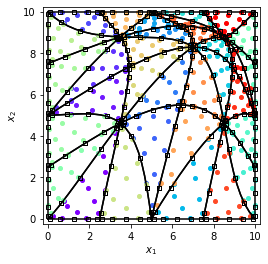

In [5]:
solver.discretization.plot()